In [ ]:
#pip install imbalanced-learn


##exxplor data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import numpy as np
from sklearn.metrics import f1_score

from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score


In [2]:

df = pd.read_csv('/content/Occupancy_Estimation.csv')
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,12/22/2017,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,12/22/2017,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,12/22/2017,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,12/22/2017,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,12/22/2017,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [3]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.drop(columns=['Date', 'Time'], inplace=True)

In [4]:
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['minute'] = df['DateTime'].dt.minute
df['second'] = df['DateTime'].dt.second

df.drop(columns=['DateTime'], inplace=True)

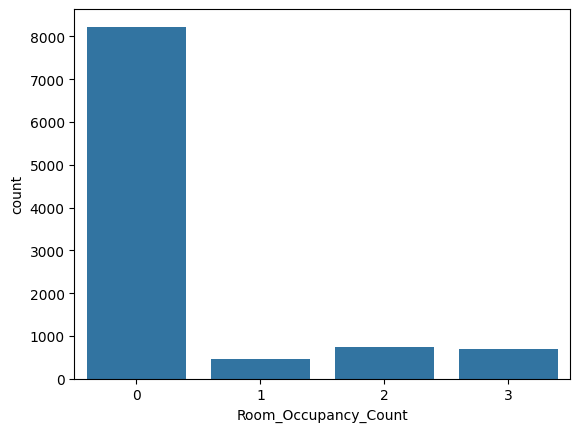

In [ ]:
sns.countplot(x = 'Room_Occupancy_Count' , data = df)
plt.show()

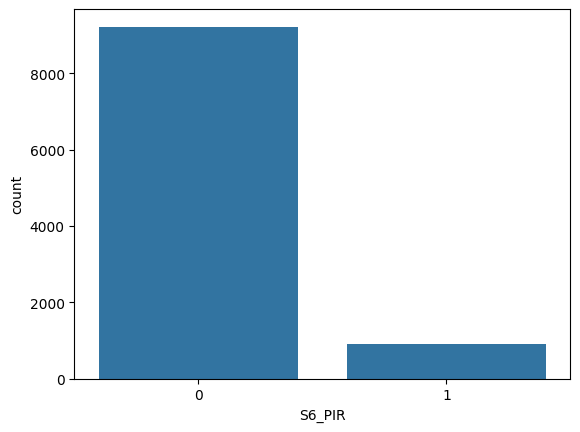

In [ ]:
sns.countplot(x = 'S6_PIR' , data = df)
plt.show()

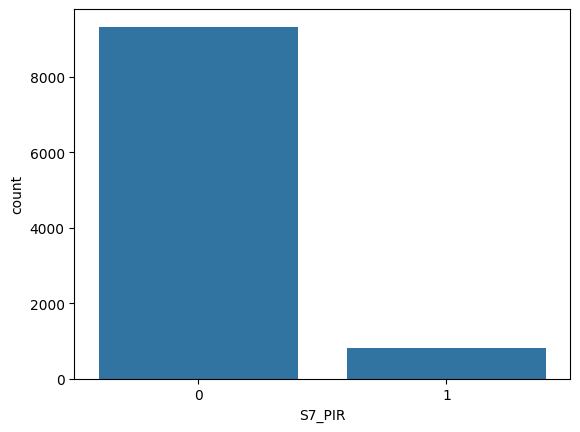

In [ ]:
sns.countplot(x = 'S7_PIR' , data = df)
plt.show()

In [ ]:
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,...,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Year,Month,Day,Hour,minute,second
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,...,0.769231,0,0,1,2017,12,22,10,49,41
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,...,0.646154,0,0,1,2017,12,22,10,50,12
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,...,0.519231,0,0,1,2017,12,22,10,50,42
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,...,0.388462,0,0,1,2017,12,22,10,51,13
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,...,0.253846,0,0,1,2017,12,22,10,51,44


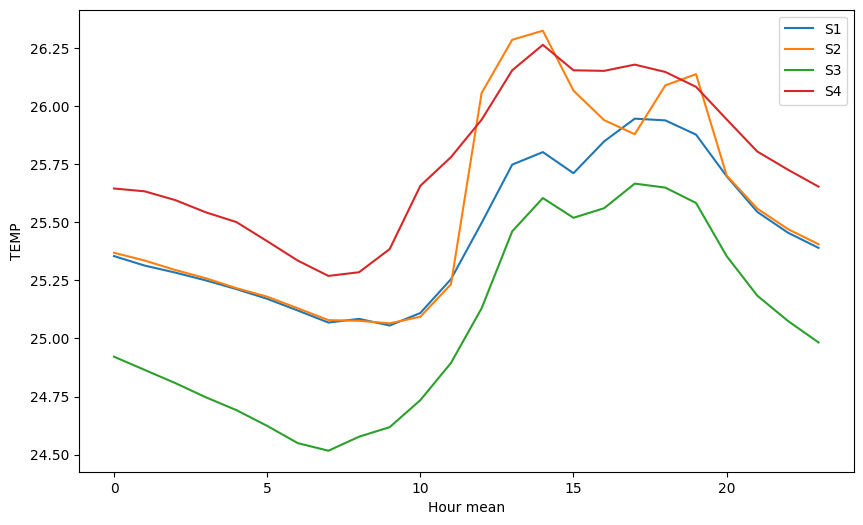

In [ ]:
S1 = pd.DataFrame(df[['S1_Temp', 'Hour']])
S2 = pd.DataFrame(df[['S2_Temp', 'Hour']])
S3 = pd.DataFrame(df[['S3_Temp', 'Hour']])
S4 = pd.DataFrame(df[['S4_Temp', 'Hour']])


S1 = S1.groupby(['Hour']).mean()
S2 = S2.groupby(['Hour']).mean()
S3 = S3.groupby(['Hour']).mean()
S4 = S4.groupby(['Hour']).mean()

plt.figure(figsize=(10, 6))

plt.plot(S1.index, S1['S1_Temp'], label='S1')
plt.plot(S2.index, S2['S2_Temp'], label='S2')
plt.plot(S3.index, S3['S3_Temp'], label='S3')
plt.plot(S4.index, S4['S4_Temp'], label='S4')
plt.xlabel('Hour mean')
plt.ylabel('TEMP')

plt.legend()
plt.show()


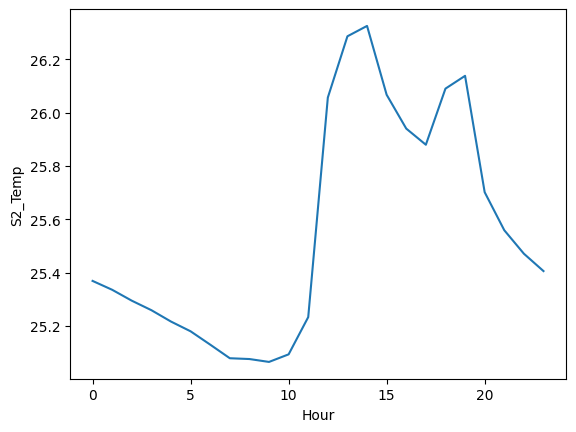

In [ ]:
S1 = pd.DataFrame(df[['S2_Temp', 'Hour']])

S1 = S1.groupby(['Hour']).mean()

sns.lineplot(x="Hour", y="S2_Temp", data=S1)
plt.show()

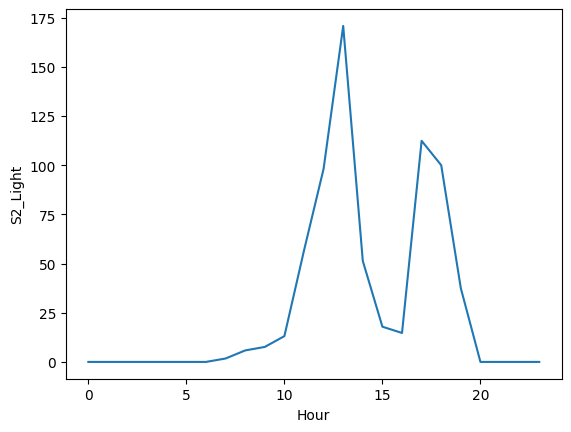

In [ ]:
S1 = pd.DataFrame(df[['S2_Light', 'Hour']])

S1 = S1.groupby(['Hour']).mean()

sns.lineplot(x="Hour", y="S2_Light", data=S1)
plt.show()

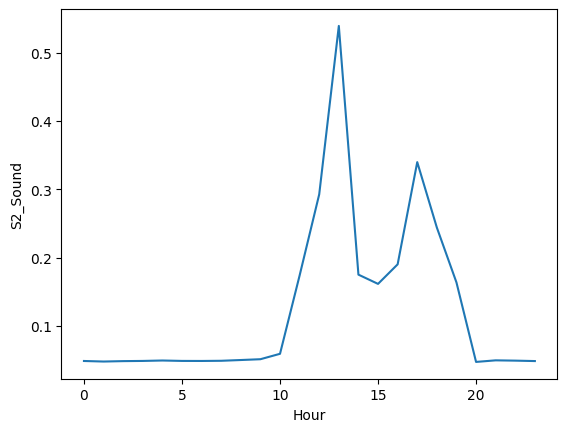

In [ ]:
S1 = pd.DataFrame(df[['S2_Sound', 'Hour']])

S1 = S1.groupby(['Hour']).mean()

sns.lineplot(x="Hour", y="S2_Sound", data=S1)
plt.show()

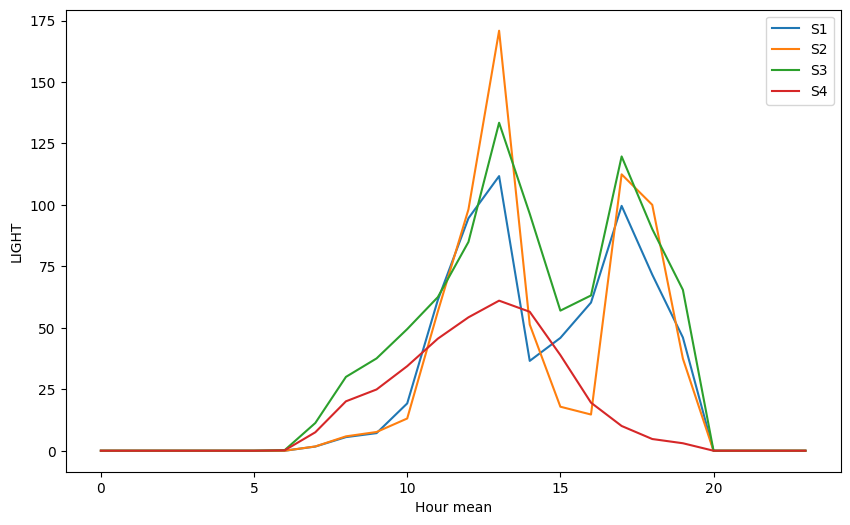

In [ ]:
S1 = pd.DataFrame(df[['S1_Light', 'Hour']])
S2 = pd.DataFrame(df[['S2_Light', 'Hour']])
S3 = pd.DataFrame(df[['S3_Light', 'Hour']])
S4 = pd.DataFrame(df[['S4_Light', 'Hour']])


S1 = S1.groupby(['Hour']).mean()
S2 = S2.groupby(['Hour']).mean()
S3 = S3.groupby(['Hour']).mean()
S4 = S4.groupby(['Hour']).mean()

plt.figure(figsize=(10, 6))

plt.plot(S1.index, S1['S1_Light'], label='S1')
plt.plot(S2.index, S2['S2_Light'], label='S2')
plt.plot(S3.index, S3['S3_Light'], label='S3')
plt.plot(S4.index, S4['S4_Light'], label='S4')

plt.xlabel('Hour mean')
plt.ylabel('LIGHT')
plt.legend()
plt.show()


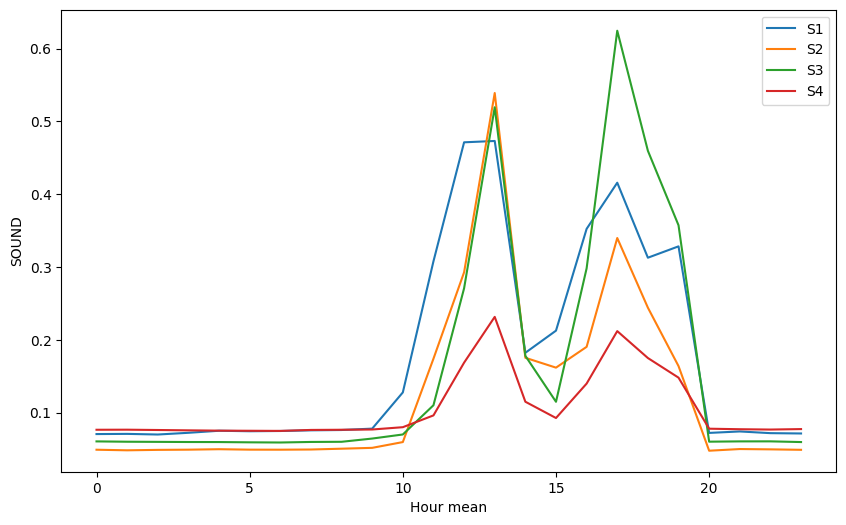

In [ ]:
S1 = pd.DataFrame(df[['S1_Sound', 'Hour']])
S2 = pd.DataFrame(df[['S2_Sound', 'Hour']])
S3 = pd.DataFrame(df[['S3_Sound', 'Hour']])
S4 = pd.DataFrame(df[['S4_Sound', 'Hour']])


S1 = S1.groupby(['Hour']).mean()
S2 = S2.groupby(['Hour']).mean()
S3 = S3.groupby(['Hour']).mean()
S4 = S4.groupby(['Hour']).mean()

plt.figure(figsize=(10, 6))

plt.plot(S1.index, S1['S1_Sound'], label='S1')
plt.plot(S2.index, S2['S2_Sound'], label='S2')
plt.plot(S3.index, S3['S3_Sound'], label='S3')
plt.plot(S4.index, S4['S4_Sound'], label='S4')
plt.xlabel('Hour mean')
plt.ylabel('SOUND')

plt.legend()
plt.show()


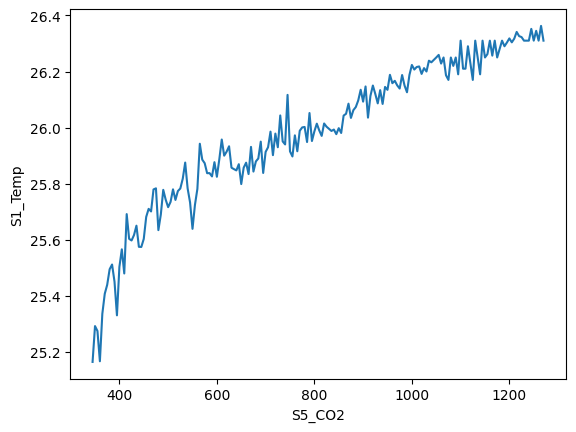

In [ ]:
S1 = pd.DataFrame(df[['S1_Temp', 'S5_CO2']])

S1 = S1.groupby(['S5_CO2']).mean()

sns.lineplot(x="S5_CO2", y="S1_Temp", data=S1)
plt.show()

##modeling

In [5]:
X = df.drop(columns=['Room_Occupancy_Count','S2_Temp', 'S2_Sound', 'S2_Light'])
y = df['Room_Occupancy_Count']
X = scale.fit_transform(X)

#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
#X_train_scaled = scale(X_train)
#X_test_scaled = scale(X_test)



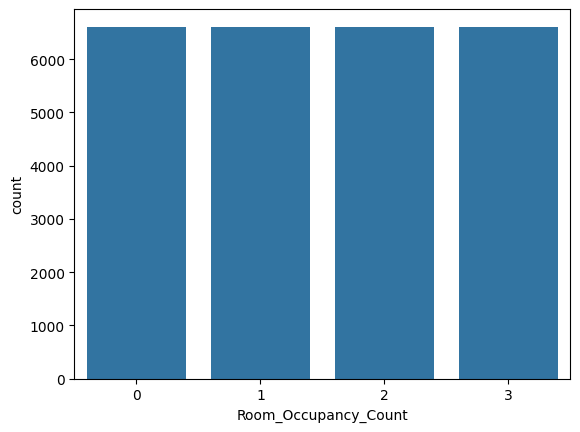

In [ ]:
sns.countplot(x=y_train)
plt.show()


In [8]:
#################################rf_classifier

rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

y_pred = grid_search.predict(X_test)


pre_f1 = f1_score(y_test, y_pred, average='macro')
pre_precision = precision_score(y_test, y_pred, average='macro')
pre_recall = recall_score(y_test, y_pred, average='macro')
print("Validation Scores for Each Fold:")
for i in range(4):
    fold_key = f'split{i}_test_score'
    print(f"Fold {i + 1}: {grid_search.cv_results_[fold_key][grid_search.best_index_]}")
print("Validation Score: ", grid_search.best_score_)
print(f"Best Parameters: {best_params}")

print(f"F1 Score on Test Set: {pre_f1}")
print(f"Precision on Test Set: {pre_precision}")
print(f"Recall on Test Set: {pre_recall}")



Validation Scores for Each Fold:
Fold 1: 0.9982980332829047
Fold 2: 0.9988651409116701
Fold 3: 0.9986759977302818
Fold 4: 0.9996217136372234
Validation Score:  0.9988652052947501
Best Parameters: {'max_depth': 15, 'n_estimators': 100}
F1 Score on Test Set: 0.9950373828724413
Precision on Test Set: 0.9949201583779315
Recall on Test Set: 0.9951655052264808


In [9]:
########################################################33
##########################################################xgb_classifier
from sklearn.preprocessing import scale



xgb_classifier = xgb.XGBClassifier(random_state=42)

XG_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

gridXG_search = GridSearchCV(estimator=xgb_classifier, param_grid=XG_grid, cv=5)
gridXG_search.fit(X_train, y_train)

bestXG_params = gridXG_search.best_params_




y_pred = gridXG_search.predict(X_test)

pre1_XGf1 = f1_score(y_test, y_pred, average='macro')
pre1_XGprecision = precision_score(y_test, y_pred, average='macro')
pre1_XGrecall = recall_score(y_test, y_pred, average='macro')


print(f"Best Parameters: {bestXG_params}")
print("###################################################################################")
print("Validation Scores for Each Fold:")
for i in range(4):
    fold_key = f'split{i}_test_score'
    print(f"Fold {i + 1}: {grid_search.cv_results_[fold_key][grid_search.best_index_]}")

print("Validation Score: ", grid_search.best_score_)

print("###################################################################################")

print("Validation Score: ", grid_search.best_score_)

print(f"F1 Score on Test Set: {pre1_XGf1}")
print(f"Precision on Test Set: {pre1_XGprecision}")
print(f"Recall on Test Set: {pre1_XGrecall}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
###################################################################################
Validation Scores for Each Fold:
Fold 1: 0.9982980332829047
Fold 2: 0.9988651409116701
Fold 3: 0.9986759977302818
Fold 4: 0.9996217136372234
Validation Score:  0.9988652052947501
###################################################################################
Validation Score:  0.9988652052947501
F1 Score on Test Set: 0.9957293386052473
Precision on Test Set: 0.9949295104653175
Recall on Test Set: 0.9965354791640213


In [10]:

##GradientBoostingClassifier
#gb_classifier = GradientBoostingClassifier(random_state=42)

GRA_grid = { 'n_estimators': [100, 150],'learning_rate': [0.1, 0.01]}
gb_classifier= GradientBoostingClassifier(random_state=42)

gridGRA_search = GridSearchCV(gb_classifier, param_grid=GRA_grid, cv=5)
gridGRA_search.fit(X_train, y_train)

bestGRA_params = gridGRA_search.best_params_

#best_gb_classifier = gridGRA_search.best_estimator_
y_pred = gridGRA_search.predict(X_test)

pre2_f1GRA = f1_score(y_test, y_pred, average='macro')
pre2_precisionGRA = precision_score(y_test, y_pred, average='macro')
pre2_recallGRA = recall_score(y_test, y_pred, average='macro')

print(f"Best Parameters: {bestGRA_params}")
print("###################################################################################")
print("Validation Scores for Each Fold:")
for i in range(5):
    fold_key = f'split{i}_test_score'
    print(f"Fold {i + 1}: {grid_search.cv_results_[fold_key][grid_search.best_index_]}")
print("Validation Score: ", grid_search.best_score_)

print("###################################################################################")

print(f"F1 Score on Test Set: {pre2_f1GRA}")
print(f"Precision on Test Set: {pre2_precisionGRA}")
print(f"Recall on Test Set: {pre2_recallGRA}")

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 150}
###################################################################################
Validation Scores for Each Fold:
Fold 1: 0.9982980332829047
Fold 2: 0.9988651409116701
Fold 3: 0.9986759977302818
Fold 4: 0.9996217136372234
Fold 5: 0.9988651409116701
Validation Score:  0.9988652052947501
###################################################################################
F1 Score on Test Set: 0.991400017394467
Precision on Test Set: 0.9907616686742529
Recall on Test Set: 0.992116724738676


In [11]:
svm_classifier = SVC(random_state=42)

SVM_grid = {"C": [0.1, 0.3], "kernel": ["linear", "rbf", "poly"],"gamma": [0.1, 0.5]}
gridSVM_search = GridSearchCV(estimator=svm_classifier, param_grid=SVM_grid, cv=5)
gridSVM_search.fit(X_train, y_train)

bestSVM_params = gridSVM_search.best_params_

y_pred = gridSVM_search.predict(X_test)

pre3_f1SVM = f1_score(y_test, y_pred, average='macro')
pre3_precisionSVM = precision_score(y_test, y_pred, average='macro')
pre3_recallSVM = recall_score(y_test, y_pred, average='macro')

print(f"Best Parameters: {bestSVM_params}")
print("###################################################################################")
print("Validation Scores for Each Fold:")
for i in range(5):
    fold_key = f'split{i}_test_score'
    print(f"Fold {i + 1}: {grid_search.cv_results_[fold_key][grid_search.best_index_]}")
print("Validation Score: ", grid_search.best_score_)

print("###################################################################################")

print(f"F1 Score on Test Set: {pre3_f1SVM}")
print(f"Precision on Test Set: {pre3_precisionSVM}")
print(f"Recall on Test Set: {pre3_recallSVM}")

Best Parameters: {'C': 0.1, 'gamma': 0.5, 'kernel': 'poly'}
###################################################################################
Validation Scores for Each Fold:
Fold 1: 0.9982980332829047
Fold 2: 0.9988651409116701
Fold 3: 0.9986759977302818
Fold 4: 0.9996217136372234
Fold 5: 0.9988651409116701
Validation Score:  0.9988652052947501
###################################################################################
F1 Score on Test Set: 0.9684112202798705
Precision on Test Set: 0.9677763367145551
Recall on Test Set: 0.9691518487049706


In [12]:
data = {
    'Model': ['Random Forest', 'XGBoost', 'Gradient Boost', 'SVM'],
    'F1 Score': [pre_f1, pre1_XGf1, pre2_f1GRA, pre3_f1SVM],
    'Precision': [pre_precision, pre1_XGprecision, pre2_precisionGRA, pre3_precisionSVM],
    'Recall': [pre_recall, pre1_XGrecall, pre2_recallGRA,pre3_recallSVM ]
}

metrics_df = pd.DataFrame(data)

print(metrics_df)

            Model  F1 Score  Precision    Recall
0   Random Forest  0.995037   0.994920  0.995166
1         XGBoost  0.995729   0.994930  0.996535
2  Gradient Boost  0.991400   0.990762  0.992117
3             SVM  0.968411   0.967776  0.969152


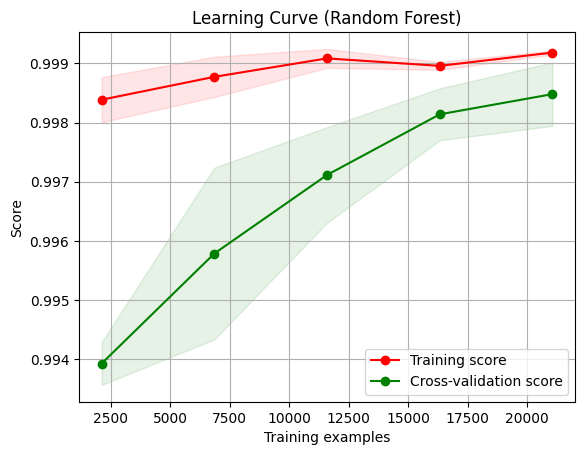

In [ ]:
# from sklearn.model_selection import learning_curve

# def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
#     plt.figure()
#     plt.title(title)
#     if ylim is not None:
#         plt.ylim(*ylim)
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     plt.grid()

#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#              label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#              label="Cross-validation score")

#     plt.legend(loc="best")
#     return plt



##Modiling without pre

In [13]:
X_resampled = df.drop(columns=['Room_Occupancy_Count'])
y_resampled = df['Room_Occupancy_Count']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [16]:
#################################rf_classifier

rf_classifier = RandomForestClassifier(random_state=42)

# param_grid = {
#     'n_estimators': [100, 150, 200],
#     'max_depth': [5, 10, 15]
# }

#grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
rf_classifier.fit(X_train, y_train)

#best_params = grid_search.best_params_

y_pred = rf_classifier.predict(X_test)

f1_micro = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

#print(f"Best Parameters: {best_params}")
print(f"F1 Score (micro) on Test Set: {f1_micro}")
print(f"Precision on Test Set: {precision}")
print(f"Recall on Test Set: {recall}")

F1 Score (micro) on Test Set: 0.9947129782640354
Precision on Test Set: 0.9942766972291512
Recall on Test Set: 0.9951655052264808


In [18]:
########################################################33
##########################################################xgb_classifier
from sklearn.preprocessing import scale



xgb_classifier = xgb.XGBClassifier(random_state=42)

# XG_grid = {
#     'n_estimators': [100, 150, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001]
# }

#gridXG_search = GridSearchCV(estimator=xgb_classifier, param_grid=XG_grid, cv=5)
xgb_classifier.fit(X_train, y_train)

#bestXG_params = gridXG_search.best_params_




y_pred = xgb_classifier.predict(X_test)

XGf1 = f1_score(y_test, y_pred, average='macro')
XGprecision = precision_score(y_test, y_pred, average='macro')
XGrecall = recall_score(y_test, y_pred, average='macro')

#print(f"Best Parameters: {bestXG_params}")

print(f"F1 Score on Test Set: {XGf1}")
print(f"Precision on Test Set: {XGprecision}")
print(f"Recall on Test Set: {XGrecall}")

F1 Score on Test Set: 0.9900772973762765
Precision on Test Set: 0.9922467459557233
Recall on Test Set: 0.9880226480836237


In [19]:

##GradientBoostingClassifier
#gb_classifier = GradientBoostingClassifier(random_state=42)

#GRA_grid = { 'n_estimators': [100, 150],'learning_rate': [0.1, 0.01]}
gb_classifier= GradientBoostingClassifier(random_state=42)

#gridGRA_search = GridSearchCV(gb_classifier, param_grid=GRA_grid, cv=5)
gb_classifier.fit(X_train, y_train)

#bestGRA_params = gridGRA_search.best_params_

#best_gb_classifier = gridGRA_search.best_estimator_
y_pred = gb_classifier.predict(X_test)

f1GRA = f1_score(y_test, y_pred, average='macro')
precisionGRA = precision_score(y_test, y_pred, average='macro')
recallGRA = recall_score(y_test, y_pred, average='macro')

#print(f"Best Parameters: {bestGRA_params}")

print(f"F1 Score on Test Set: {f1GRA}")
print(f"Precision on Test Set: {precisionGRA}")
print(f"Recall on Test Set: {recallGRA}")

F1 Score on Test Set: 0.9917546471120644
Precision on Test Set: 0.9937752018881093
Recall on Test Set: 0.989808362369338


In [20]:
svm_classifier = SVC(random_state=42)

#SVM_grid = {"C": [0.1, 0.3], "kernel": ["linear", "rbf", "poly"],"gamma": [0.1, 0.5]}
#gridSVM_search = GridSearchCV(estimator=svm_classifier, param_grid=SVM_grid, cv=5)
svm_classifier.fit(X_train, y_train)

#bestSVM_params = gridSVM_search.best_params_

y_pred = svm_classifier.predict(X_test)

f1SVM = f1_score(y_test, y_pred, average='macro')
precisionSVM = precision_score(y_test, y_pred, average='macro')
recallSVM = recall_score(y_test, y_pred, average='macro')

#print(f"Best Parameters: {bestSVM_params}")

print(f"F1 Score on Test Set: {f1SVM}")
print(f"Precision on Test Set: {precisionSVM}")
print(f"Recall on Test Set: {recallSVM}")

F1 Score on Test Set: 0.9239777101454906
Precision on Test Set: 0.9482425786909551
Recall on Test Set: 0.9031794425087109


In [21]:
data = {
    'Model': ['Random Forest', 'XGBoost', 'Gradient Boost', 'SVM'],

    'F1 Score': [f1_micro, XGf1, f1GRA, f1SVM],
    'Precision': [precision, XGprecision, precisionGRA, precisionSVM],
    'Recall': [recall, XGrecall, recallGRA,recallSVM ]
}

# Creating a DataFrame from the metrics data
metrics_df = pd.DataFrame(data)

# Displaying the DataFrame
print(metrics_df)

            Model  F1 Score  Precision    Recall
0   Random Forest  0.994713   0.994277  0.995166
1         XGBoost  0.990077   0.992247  0.988023
2  Gradient Boost  0.991755   0.993775  0.989808
3             SVM  0.923978   0.948243  0.903179
